In [1]:
import pandas as pd
import numpy as np


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

<h4> Same analysis, but on a filtered set of data, resulting in a marginally reduced accuracy.<h4>

In [3]:
df2 = pd.read_csv('Materials_With_AtLeast_OneMagneticElement.csv')

In [4]:
# Separate features and target
numerical_columns = df2.select_dtypes(include=[np.number]).columns.tolist()
#categorical columns with low cardinality
extra_cols = ['is_gap_direct', 'is_stable']
selected_cols = numerical_columns + [col for col in extra_cols if col in df2.columns]
X2 = df2[selected_cols]
y2 = df2['ordering']


# Convert categorical features to numeric using one-hot encoding
X2_encoded = pd.get_dummies(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, test_size=0.2, random_state=42, stratify=y2)

imputer = SimpleImputer(strategy='mean')
X2_train_imputed = imputer.fit_transform(X2_train)
X2_test_imputed = imputer.transform(X2_test)

# Standardize features
scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train_imputed)
X2_test_scaled = scaler.transform(X2_test_imputed)


# Logistic regression with 4-fold cross-validation
clf2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=42)
scores = cross_val_score(clf2, X2_train_scaled, y2_train, cv=4, scoring='accuracy')

print(f"Cross-validated accuracy scores: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

c:\Users\dovak\Anaconda3\envs\erdos_summer_2025\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\dovak\Anaconda3\envs\erdos_summer_2025\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\dovak\Anaconda3\envs\erdos_summer_2025\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\dovak\Anaconda3\envs\erdos_summer_2025\Lib\site-packages\s

Cross-validated accuracy scores: [0.4105052  0.41013201 0.41612241 0.40884493]
Mean accuracy: 0.411


In [15]:
# Fit on full training set and evaluate on validation set
clf2.fit(X2_train_scaled, y2_train)
test_accuracy = clf2.score(X2_train_scaled, y2_train)
print(f"Test set accuracy: {test_accuracy:.3f}")

c:\Users\dovak\Anaconda3\envs\erdos_summer_2025\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test set accuracy: 0.411


Classification Report:
              precision    recall  f1-score   support

         AFM       0.08      0.64      0.15      2688
          FM       0.67      0.27      0.38     40847
         FiM       0.20      0.53      0.29      8718
          NM       0.70      0.54      0.61     33493

    accuracy                           0.41     85746
   macro avg       0.41      0.49      0.36     85746
weighted avg       0.62      0.41      0.45     85746



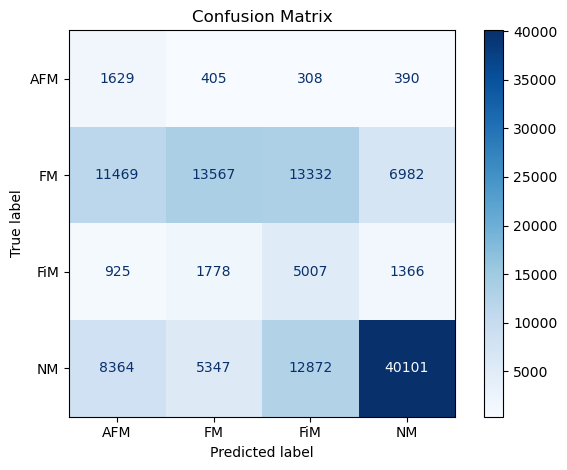

In [17]:
# Predict on the test set
y2_pred = clf2.predict(X2_train_scaled)
print("Classification Report:")
print(classification_report(y2_train, y2_pred, target_names=clf2.classes_))

# Create confusion matrix
cm = confusion_matrix(y_train, y_pred, labels=clf2.classes_)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf2.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()